##**Heart Failure Prediction**

**Importing Libraries**

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')

**Data Preprocesin**

In [3]:
df = pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.median()

<ipython-input-6-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age              54.0
RestingBP       130.0
Cholesterol     223.0
FastingBS         0.0
MaxHR           138.0
Oldpeak           0.6
HeartDisease      1.0
dtype: float64

In [7]:
df.skew()

<ipython-input-7-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
df.shape

(918, 12)

**Exploratory Data Analysis**

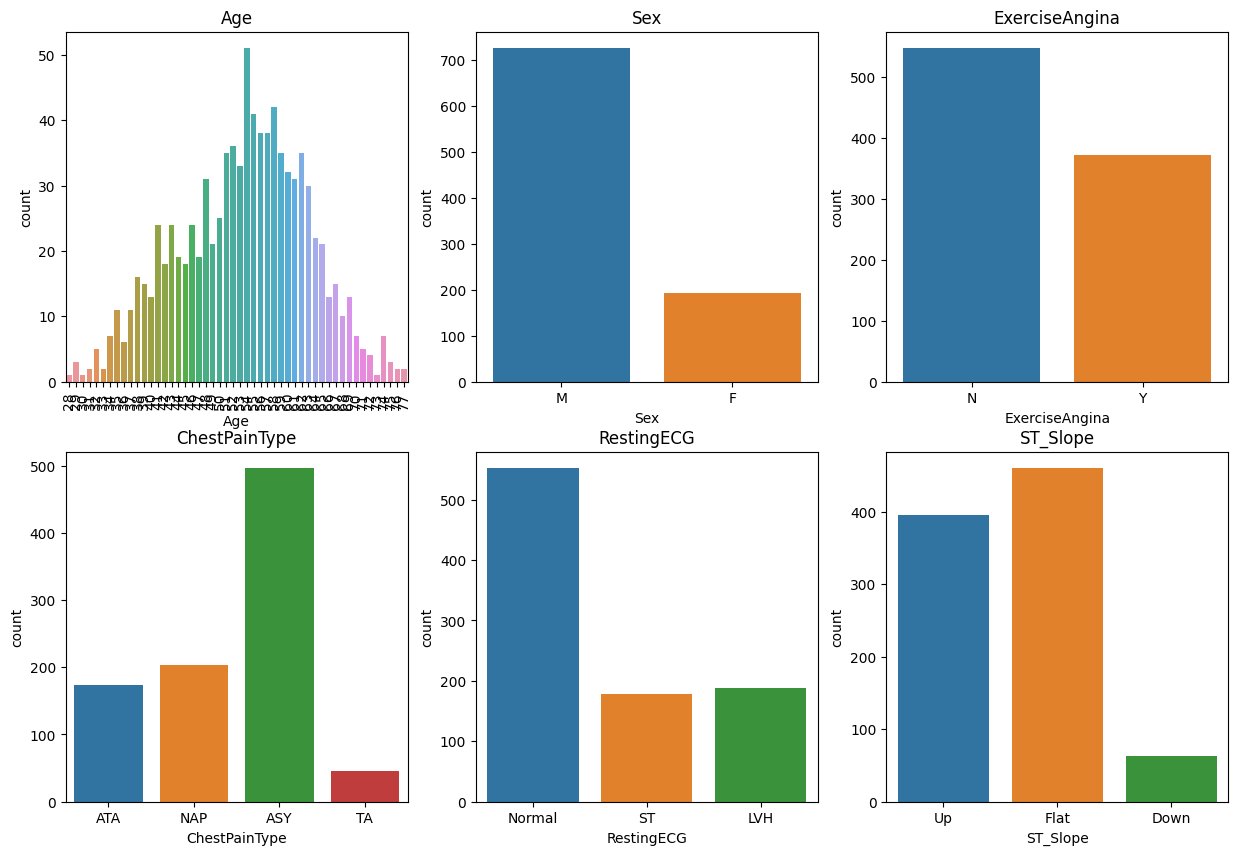

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(data = df , x = 'Age',ax = ax[0,0])
sns.countplot(data = df , x = 'Sex',ax = ax[0,1])
sns.countplot(data = df , x = 'ExerciseAngina',ax = ax[0,2])
sns.countplot(data = df , x = 'ChestPainType',ax = ax[1,0])
sns.countplot(data = df , x = 'RestingECG',ax = ax[1,1])
sns.countplot(data = df , x = 'ST_Slope',ax = ax[1,2])

ax[0, 0].set_title('Age')
ax[0, 1].set_title('Sex')
ax[0, 2].set_title('ExerciseAngina')
ax[1, 0].set_title('ChestPainType')
ax[1, 1].set_title('RestingECG')
ax[1, 2].set_title('ST_Slope')

ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)

plt.show()


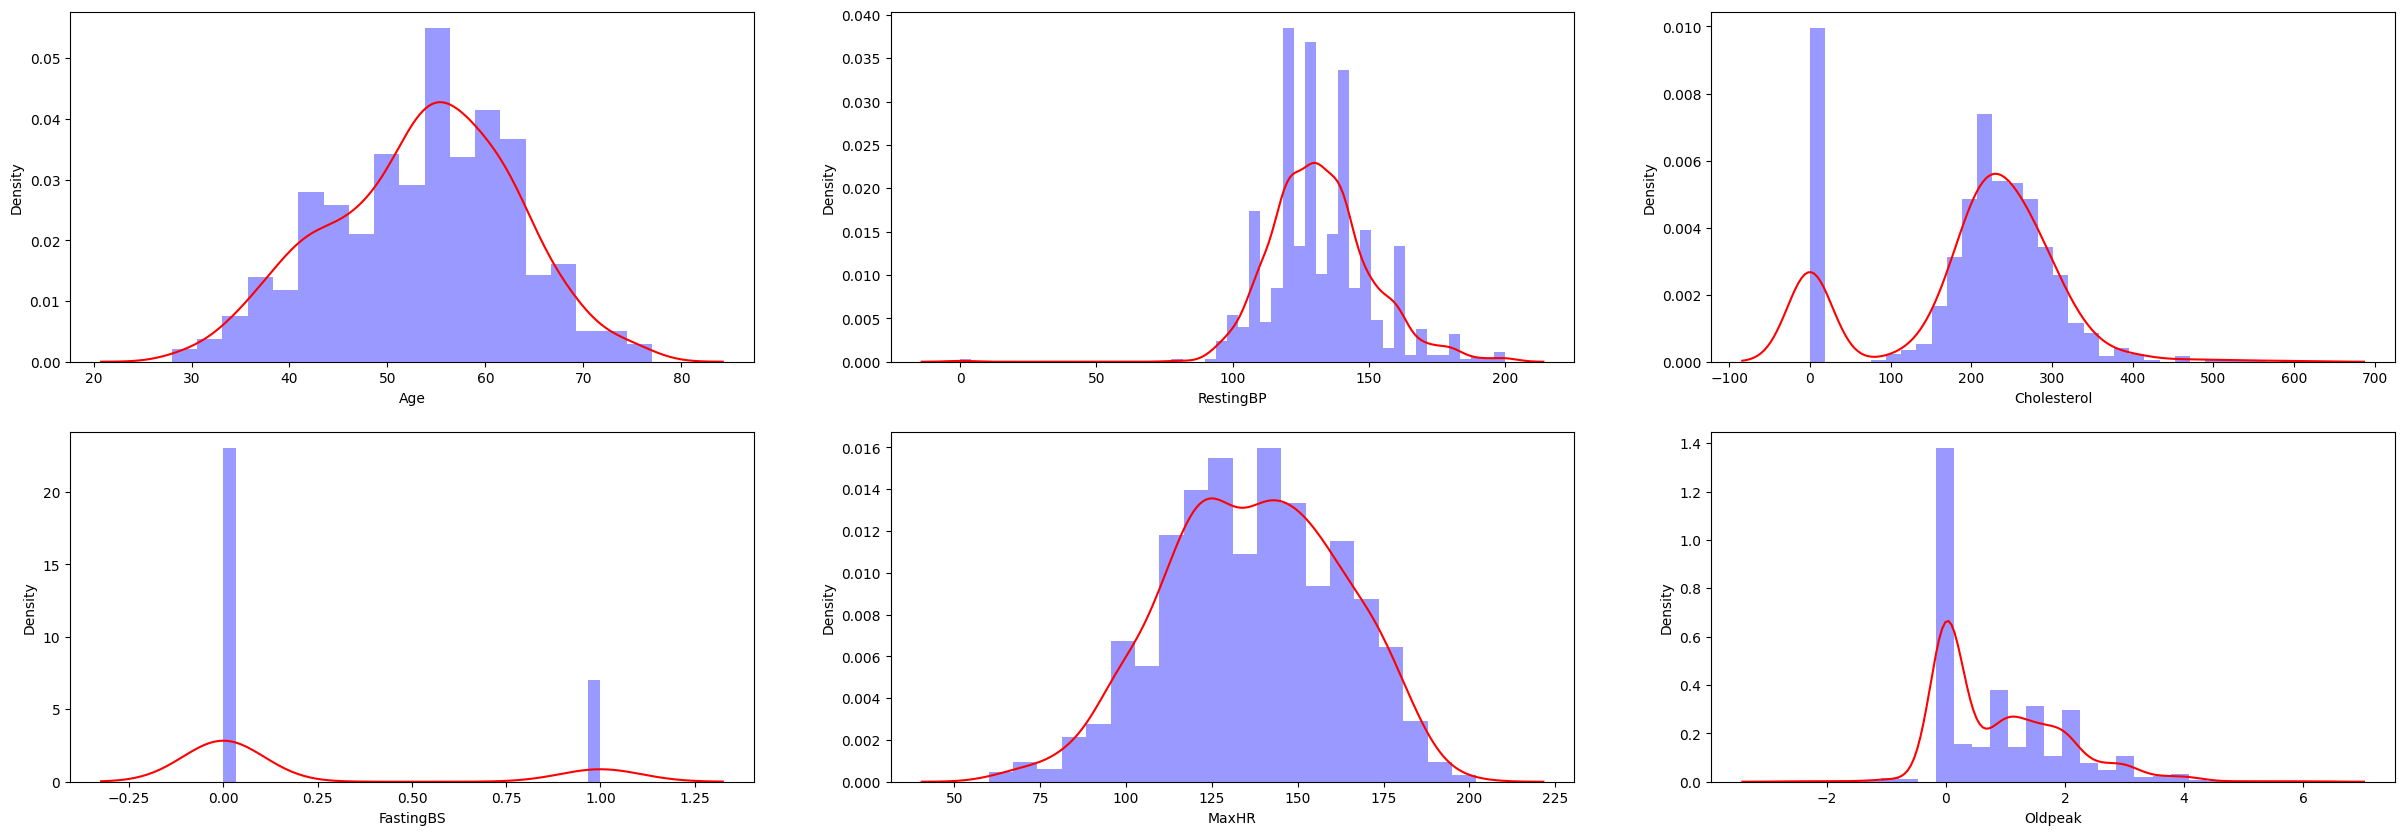

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(30, 10))

sns.distplot(df['Age'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['RestingBP'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Cholesterol'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['FastingBS'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['MaxHR'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Oldpeak'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'blue'})

plt.show()

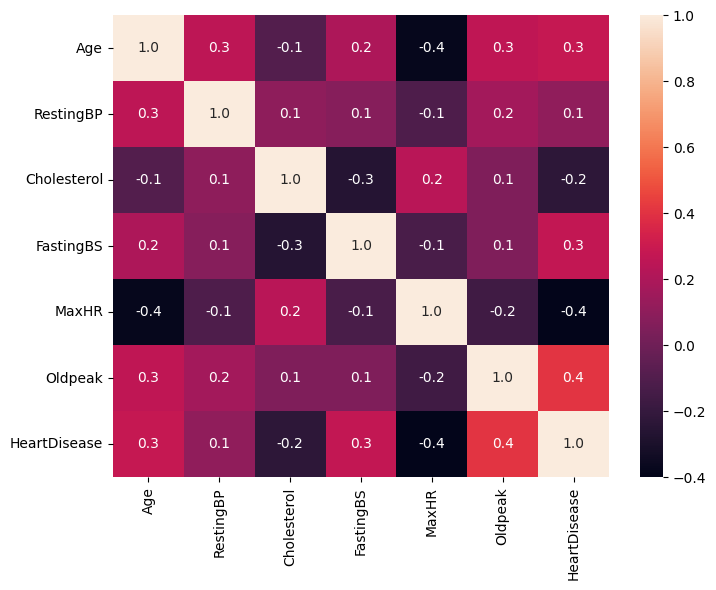

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')
plt.show()

<Axes: >

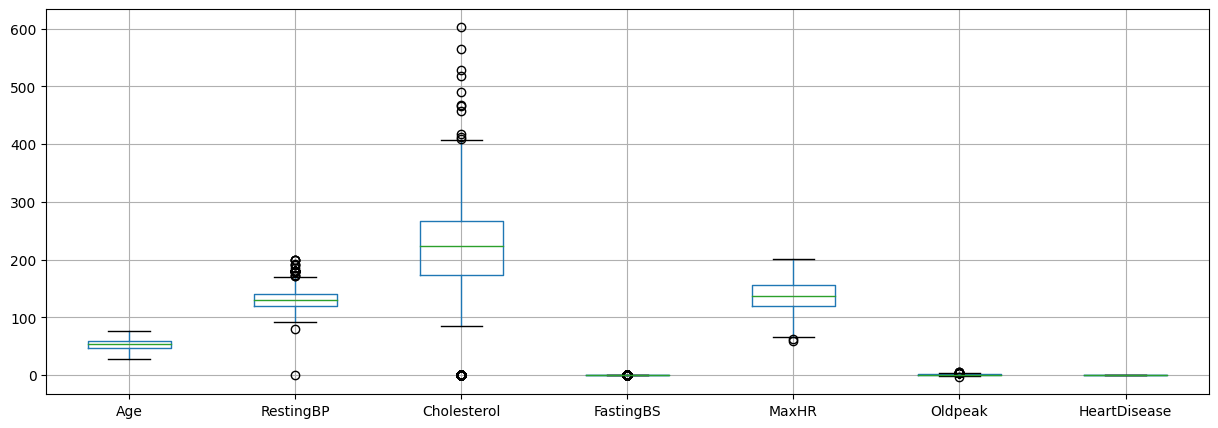

In [26]:
df.boxplot(figsize = (15,5))

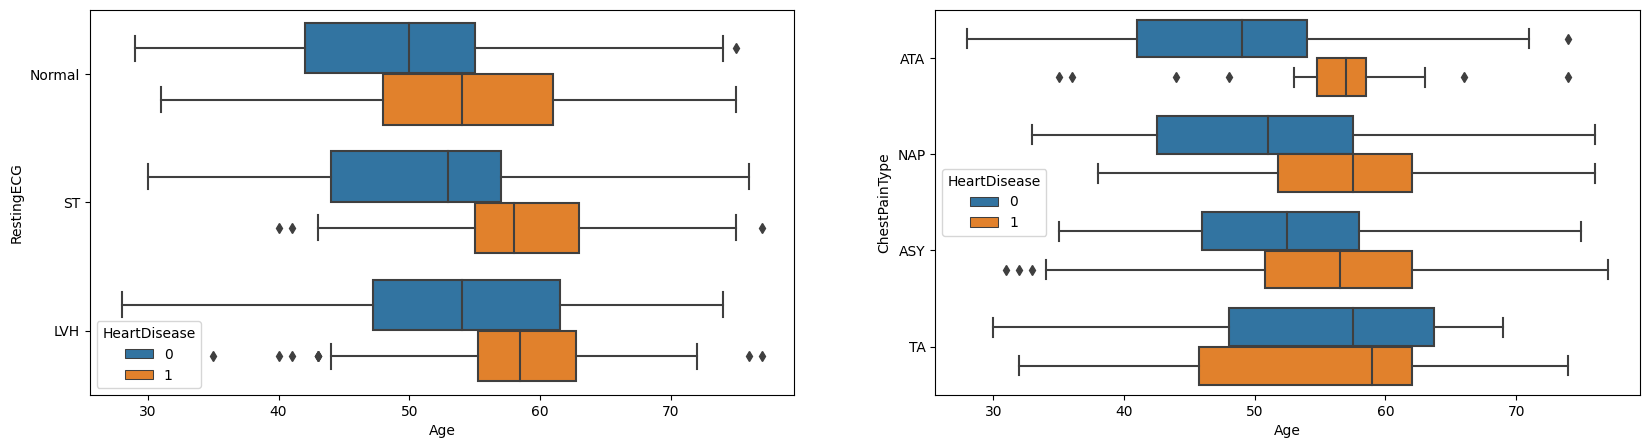

In [45]:

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=df, x='Age', y='RestingECG', hue ='HeartDisease', ax = ax[0])
sns.boxplot(data=df, x='Age', y='ChestPainType', hue ='HeartDisease', ax = ax[1])

plt.show()

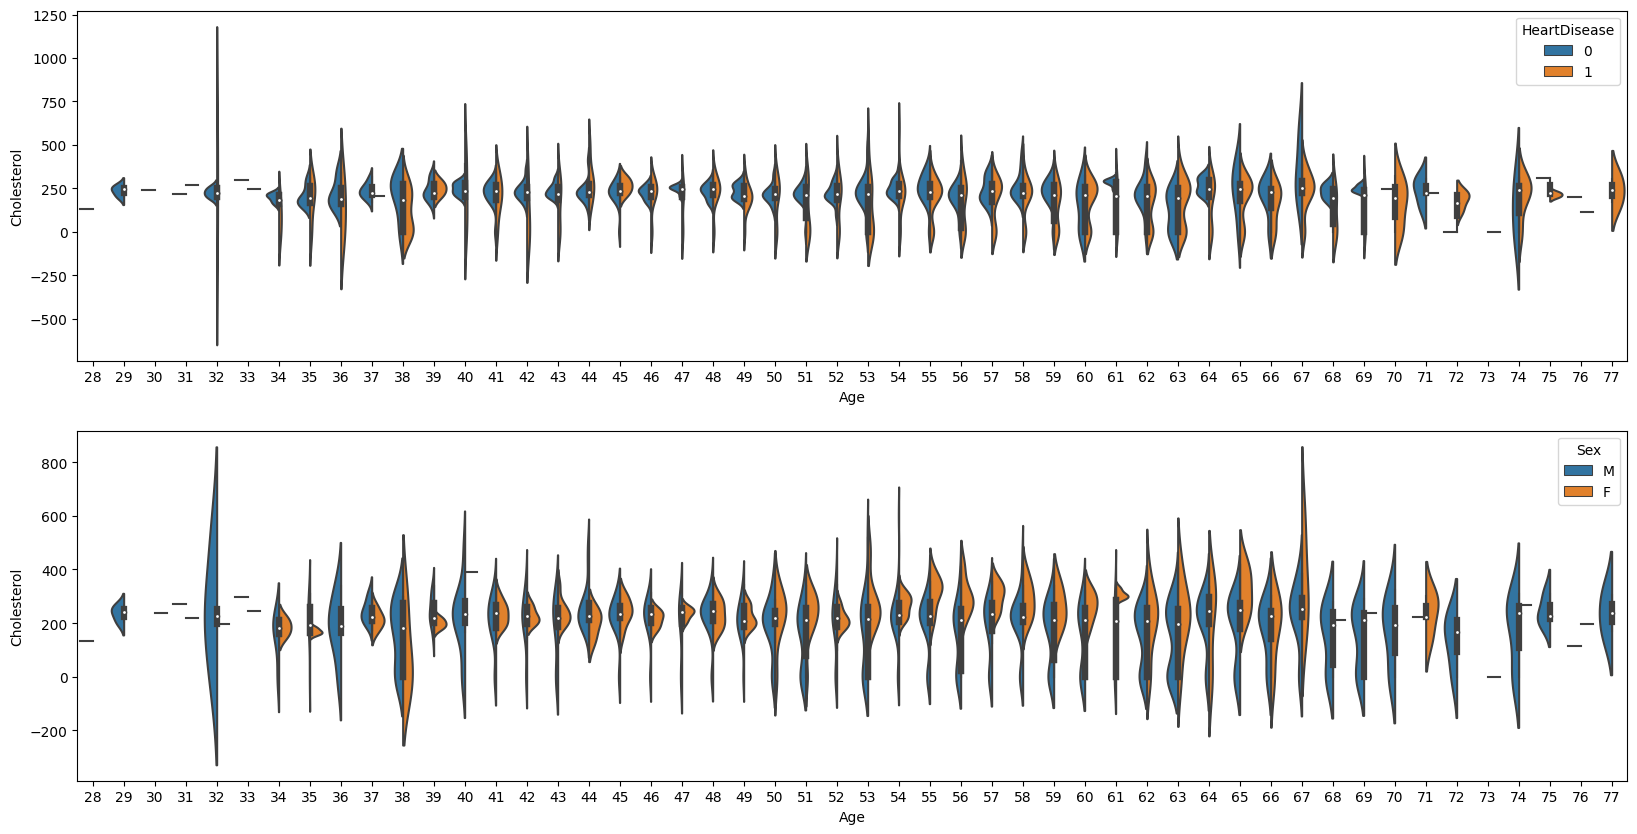

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

sns.violinplot(data=df, x='Age', y='Cholesterol', hue ='HeartDisease', split=True, ax = ax[0])
sns.violinplot(data=df, x='Age', y='Cholesterol', hue ='Sex', split=True, ax = ax[1])

plt.show()


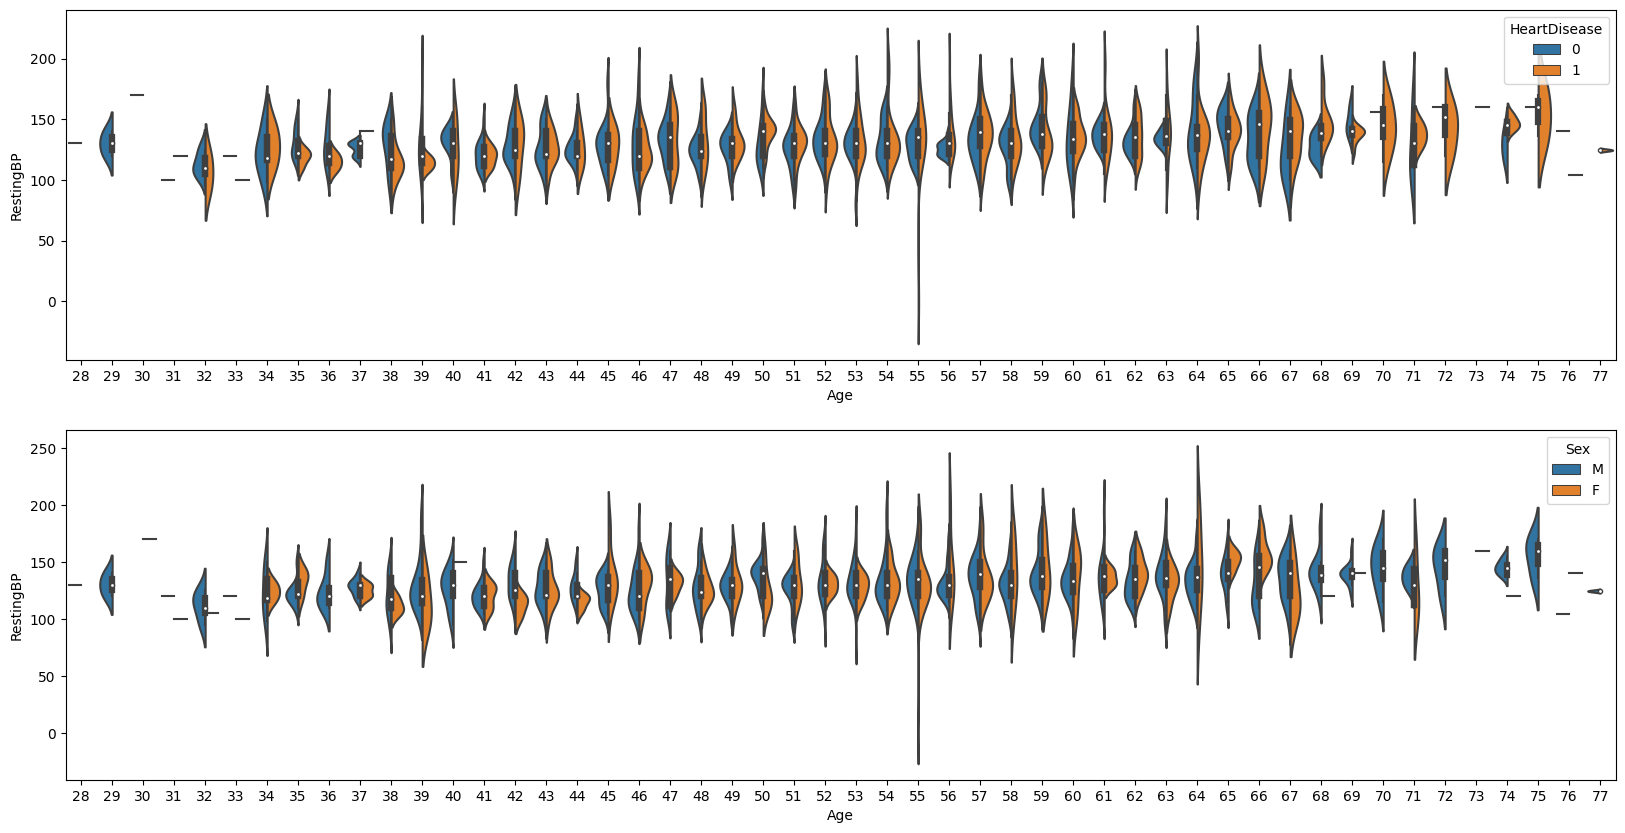

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

sns.violinplot(data=df, x='Age', y='RestingBP', hue ='HeartDisease', split=True, ax = ax[0])
sns.violinplot(data=df, x='Age', y='RestingBP', hue ='Sex', split=True, ax = ax[1])

plt.show()

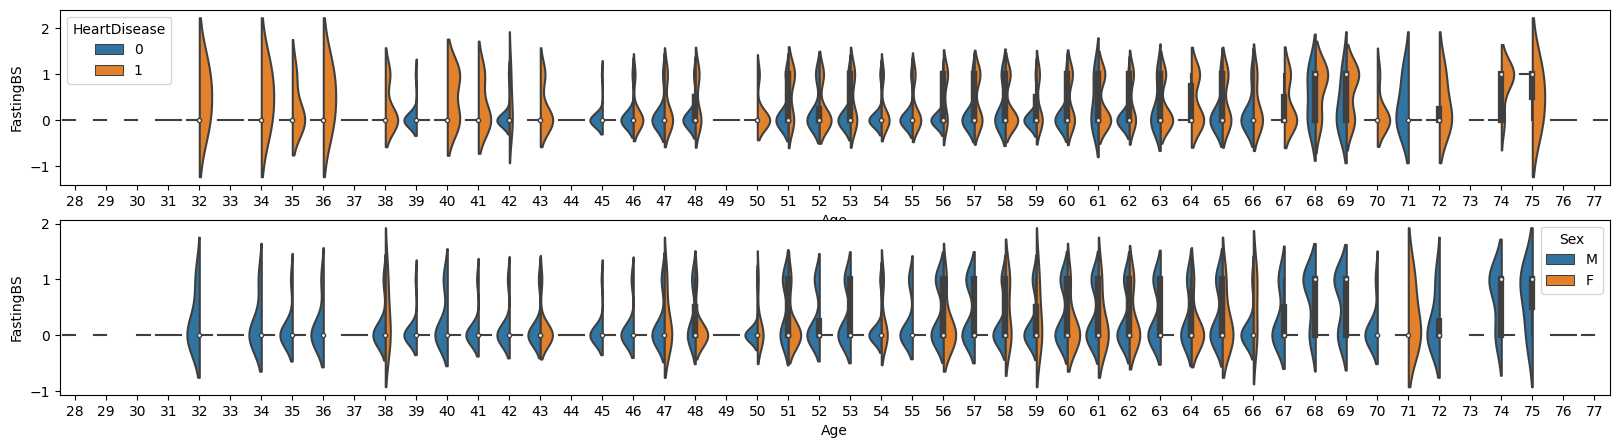

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(20, 5))

sns.violinplot(data=df, x='Age', y='FastingBS', hue ='HeartDisease', split=True, ax = ax[0])
sns.violinplot(data=df, x='Age', y='FastingBS', hue ='Sex', split=True, ax = ax[1])

plt.show()

[]

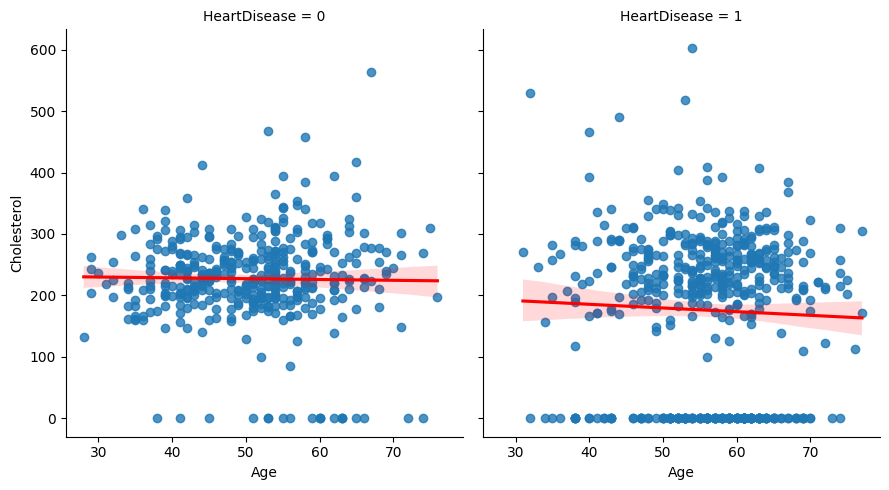

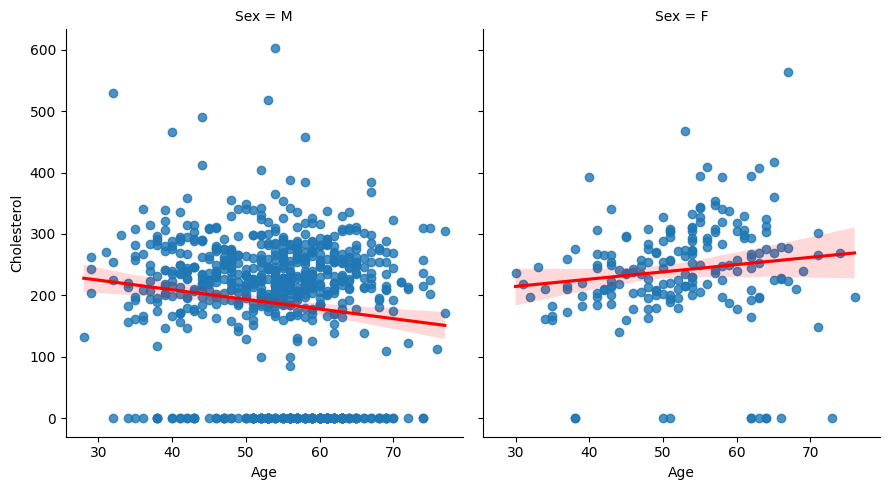

In [48]:
sns.lmplot(data=df, x='Age', y='Cholesterol', col ='HeartDisease', aspect=0.9, line_kws={'color': 'red'})
sns.lmplot(data=df, x='Age', y='Cholesterol', col ='Sex', aspect=0.9, line_kws={'color': 'red'})
plt.plot()

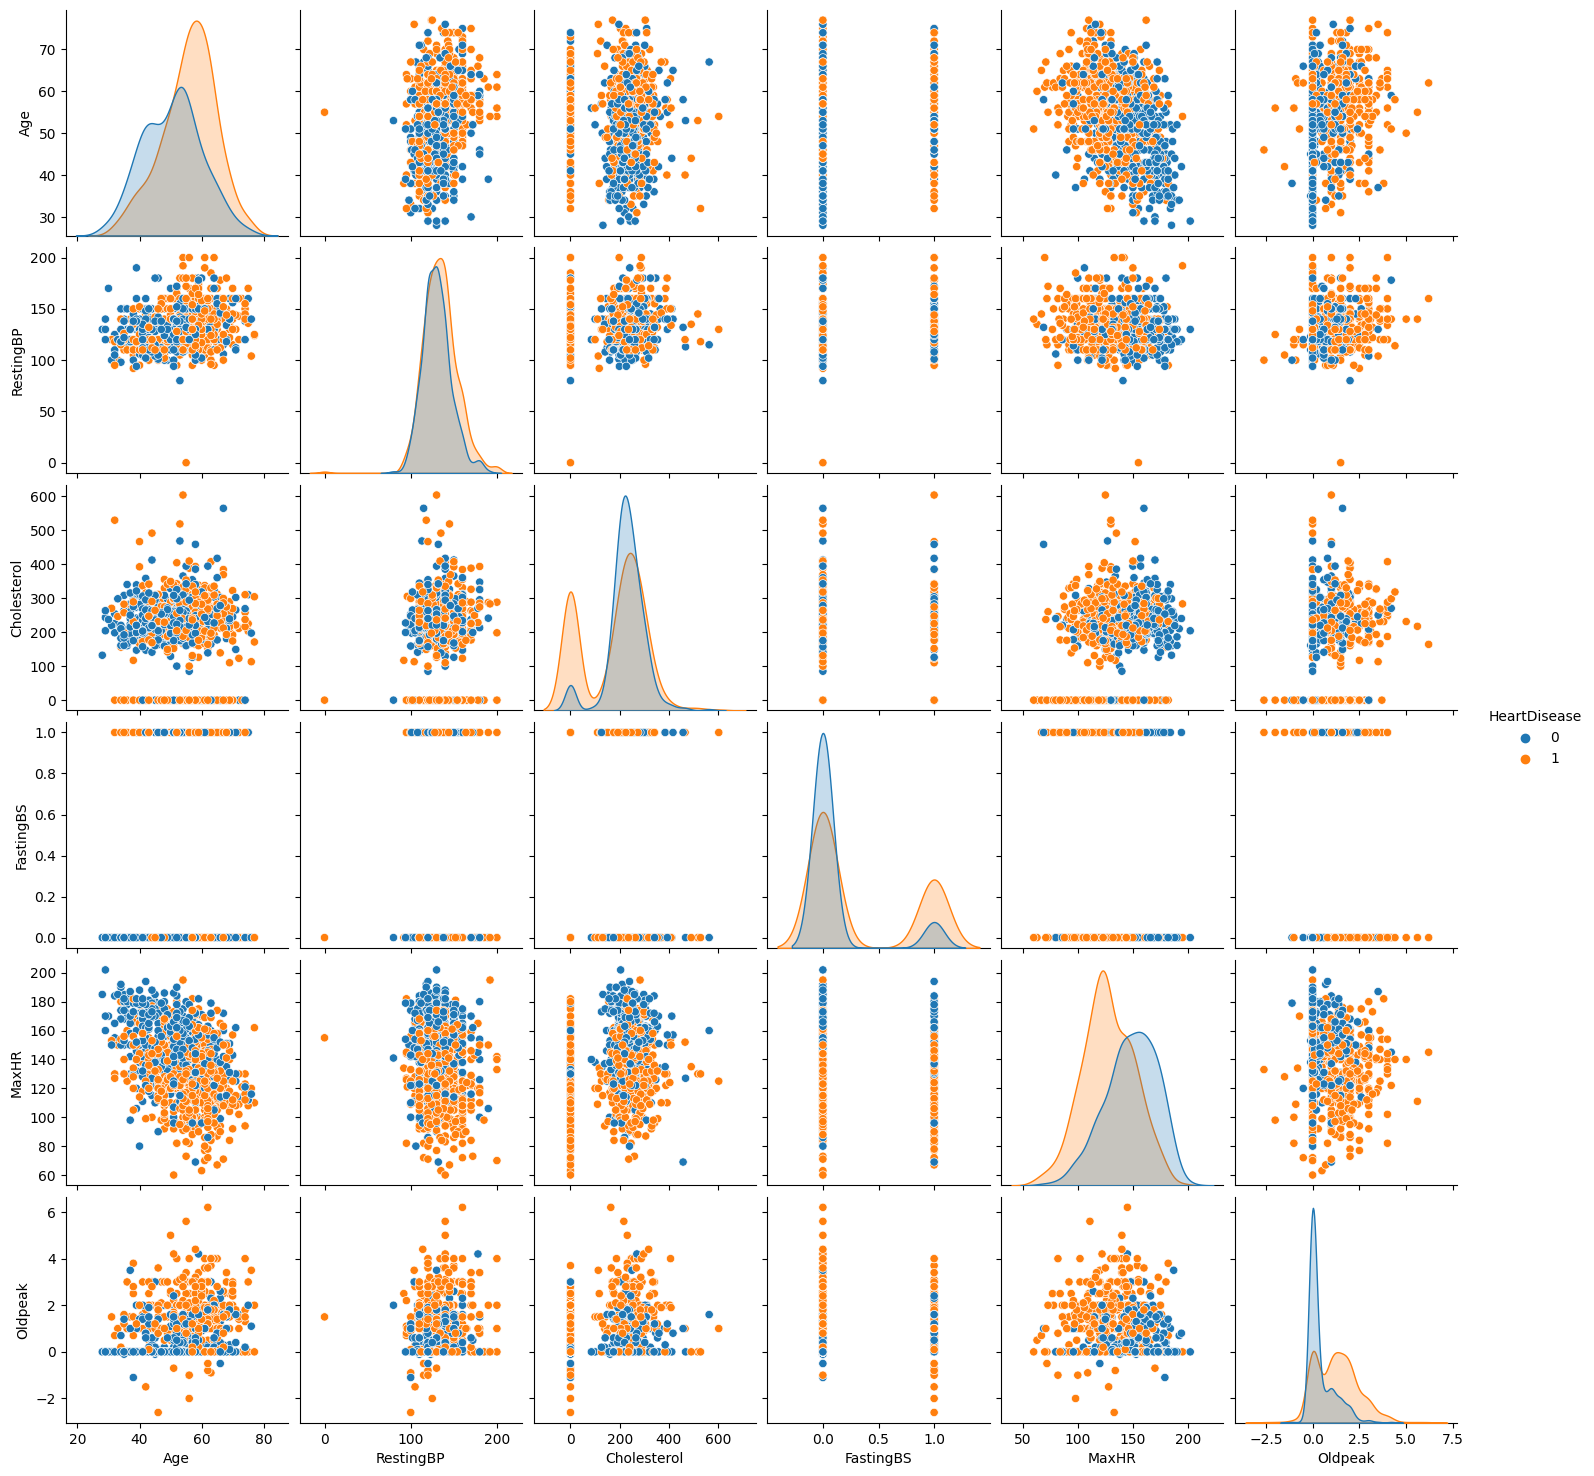

In [49]:
sns.pairplot(df, hue = 'HeartDisease')
plt.show()

**Encoder**

In [53]:
lb = LabelEncoder()

df['Sex'] = lb.fit_transform(df['Sex'])
df['ChestPainType'] = lb.fit_transform(df['ChestPainType'])
df['RestingECG'] = lb.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = lb.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = lb.fit_transform(df['ST_Slope'])

df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0


**Modeling and Evaluation**

In [102]:
X_M = df.drop('HeartDisease', axis = 1)
Y_M = df['HeartDisease']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

**Train Test Split**

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.25, random_state=42)

**Logistic Regression**

In [104]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        98
           1       0.90      0.84      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230

accuracy:  0.8565217391304348
mean_absolute_error:  0.14347826086956522
mean_squared_error:  0.14347826086956522


**Random Forest Classifier**

In [105]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90        98
           1       0.94      0.90      0.92       132

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230

accuracy:  0.908695652173913
mean_absolute_error:  0.09130434782608696
mean_squared_error:  0.09130434782608696


**Decision Tree**

In [74]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.70      0.85      0.76        98
           1       0.86      0.73      0.79       132

    accuracy                           0.78       230
   macro avg       0.78      0.79      0.78       230
weighted avg       0.79      0.78      0.78       230

accuracy:  0.7782608695652173
mean_absolute_error:  0.2217391304347826
mean_squared_error:  0.2217391304347826


**SVC**

In [75]:
model_SVC = SVC(kernel = 'linear' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        98
           1       0.89      0.85      0.87       132

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230

accuracy:  0.8521739130434782
mean_absolute_error:  0.14782608695652175
mean_squared_error:  0.14782608695652175


**KNeighborsClassifier**

In [76]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        98
           1       0.90      0.86      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230

accuracy:  0.8608695652173913
mean_absolute_error:  0.1391304347826087
mean_squared_error:  0.1391304347826087


1    132
0     98
Name: HeartDisease, dtype: int64


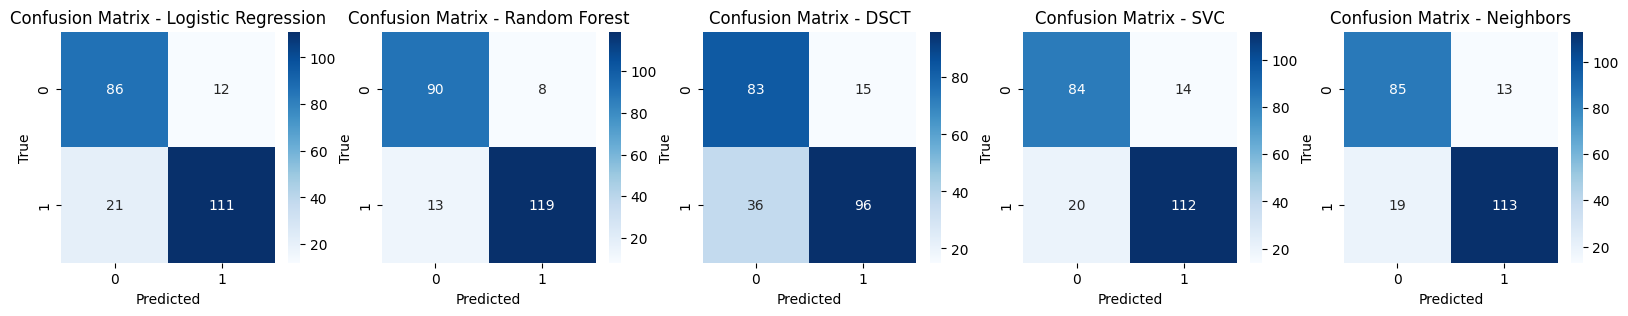

In [77]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()


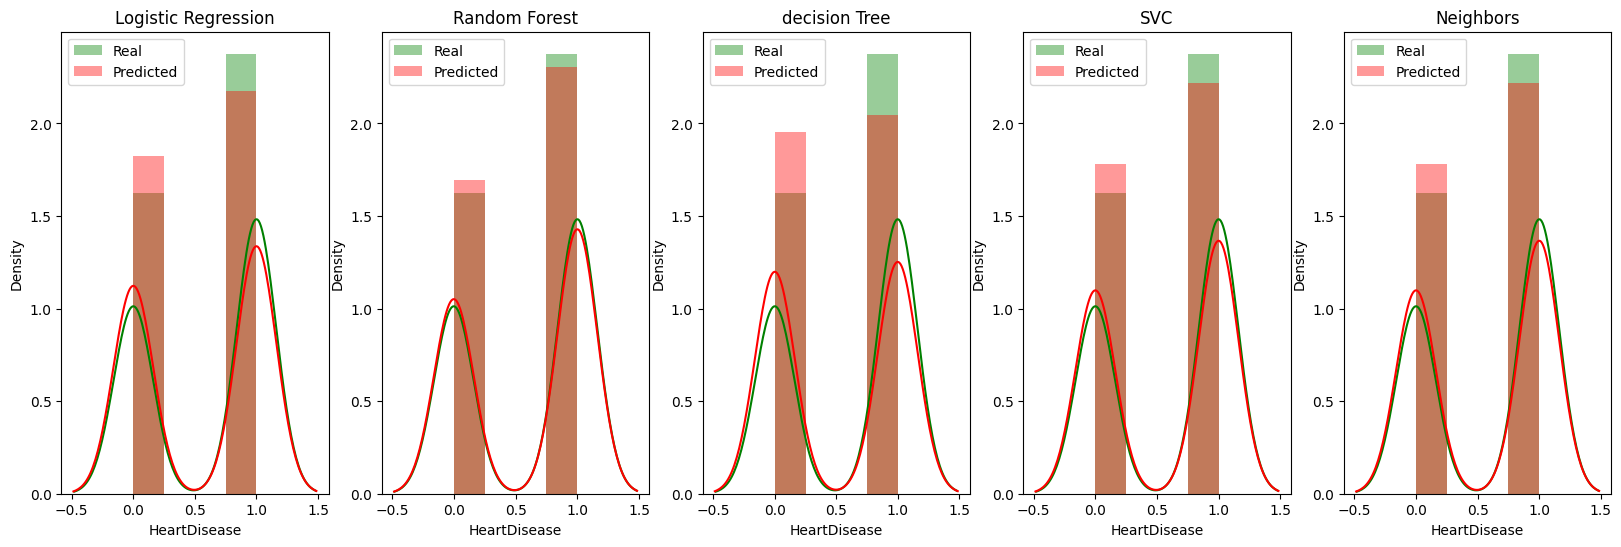

In [63]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()